In [1]:
import os
import numpy as np
from PIL import Image
from leargist import color_gist
#from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
def load_images(folder):
    images = []
    labels = []
    for root, dirs, files in os.walk(folder):
        if dirs == []:
            for name in files:
                img = Image.open(os.path.join(root, name))
                images.append(img)
                if "Other" not in root:
                    labels.append(1)
                else:
                    labels.append(0)
    return images, labels

In [3]:
def extract_gist_features(images):
    features = []
    for img in images:
        gist_descriptor = color_gist(img)
        features.append(gist_descriptor)
    return np.array(features)

In [4]:
def extract_hog_features(images):
    features = []
    for img in images:
        hog_descriptor, _ = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        features.append(hog_descriptor)
    return np.array(features)

In [5]:
# Path to the folder containing images
train_folder = "/home/kali/Documents/Major_Project/dumpware10_images/4096/300/TRAIN/"
test_folder = "/home/kali/Documents/Major_Project/dumpware10_images/4096/300/TEST/"

In [6]:
# Load images and labels
train_images, train_labels = load_images(train_folder)
test_images, test_labels = load_images(test_folder)

In [7]:
# Extract GIST features
train_gist_features = extract_gist_features(train_images)
test_gist_features = extract_gist_features(test_images)

/home/kali/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


In [8]:
# Extract HOG features
# hog_features = extract_hog_features(images)

In [9]:
# Combine GIST and HOG features
#    features = np.hstack((gist_features, hog_features))
#    print(test_images)
#    print(test_labels)

In [10]:
# Split data into training and test sets
#    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train = train_gist_features
y_train = train_labels
X_test = test_gist_features
y_test = test_labels

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# X, y = make_circles(n_samples=500, noise=0.06, random_state=42)
df = pd.DataFrame(dict(x1=X_train[:, 0], x2=X_train[:, 1], y=y_train))

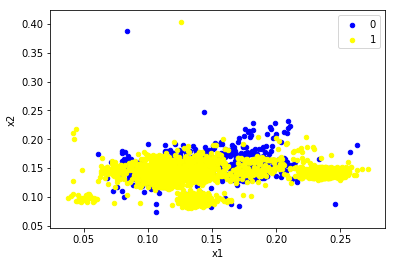

In [14]:
colors = {0:'blue', 1:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

In [21]:
# Initialize and train the SVM classifier
svm_classifier = SVC(C=10.0, kernel='rbf', gamma='scale', verbose=True)
svm_classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [22]:
# Predict and evaluate the classifier
y_pred = svm_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       121
           1       0.96      0.99      0.97       740

   micro avg       0.95      0.95      0.95       861
   macro avg       0.93      0.85      0.89       861
weighted avg       0.95      0.95      0.95       861

('Accuracy Score:', 0.9500580720092915)


In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)